In [2]:

import gzip
import json
import os
from pathlib import Path
import pickle
from tqdm import tqdm


fold = 'train'

fsmol_root_dir = Path(f'/FS-MOL/datasets/fs-mol-merged-cleaned/{fold}/')
fsmol_task_list = json.load(open('/FS-MOL/datasets/fsmol-0.1.json', 'r+b'))[fold] # Original FSMOL tasks

fsmol_task_paths = [ fsmol_root_dir / file for file in tqdm(os.listdir(fsmol_root_dir))]

def parse_jsongz(p):
# Open the gzipped JSONL file
    with open(p, 'rb') as f:
        return pickle.load(f)

sample_counts = [len(data.samples) for data in [parse_jsongz(path) for path in tqdm(fsmol_task_paths)]]

sample_counts

100%|██████████| 4758/4758 [00:50<00:00, 93.44it/s] 


[38,
 57,
 38,
 239,
 46,
 157,
 33,
 36,
 72,
 89,
 40,
 62,
 40,
 35,
 62,
 63,
 174,
 34,
 157,
 37,
 133,
 72,
 34,
 47,
 41,
 50,
 49,
 43,
 70,
 45,
 35,
 38,
 49,
 45,
 36,
 125,
 44,
 38,
 56,
 85,
 52,
 34,
 33,
 80,
 38,
 35,
 42,
 85,
 42,
 44,
 36,
 44,
 37,
 157,
 32,
 130,
 79,
 37,
 35,
 33,
 35,
 33,
 34,
 38,
 53,
 207,
 34,
 54,
 39,
 32,
 34,
 35,
 44,
 38,
 38,
 100,
 46,
 46,
 34,
 39,
 46,
 34,
 53,
 56,
 35,
 32,
 35,
 56,
 41,
 33,
 40,
 41,
 34,
 34,
 37,
 157,
 34,
 48,
 49,
 72,
 51,
 110,
 191,
 42,
 33,
 157,
 58,
 77,
 84,
 36,
 62,
 41,
 34,
 72,
 61,
 38,
 98,
 104,
 71,
 45,
 231,
 36,
 43,
 45,
 39,
 45,
 33,
 45,
 51,
 38,
 163,
 39,
 36,
 38,
 38,
 34,
 97,
 50,
 48,
 51,
 43,
 34,
 55,
 48,
 103,
 46,
 51,
 57,
 53,
 35,
 39,
 72,
 38,
 56,
 49,
 40,
 46,
 57,
 39,
 40,
 45,
 157,
 84,
 38,
 42,
 77,
 72,
 36,
 41,
 49,
 36,
 34,
 69,
 166,
 33,
 39,
 70,
 37,
 182,
 38,
 121,
 38,
 34,
 48,
 88,
 43,
 274,
 32,
 38,
 36,
 72,
 37,
 43,
 32,
 38,
 3

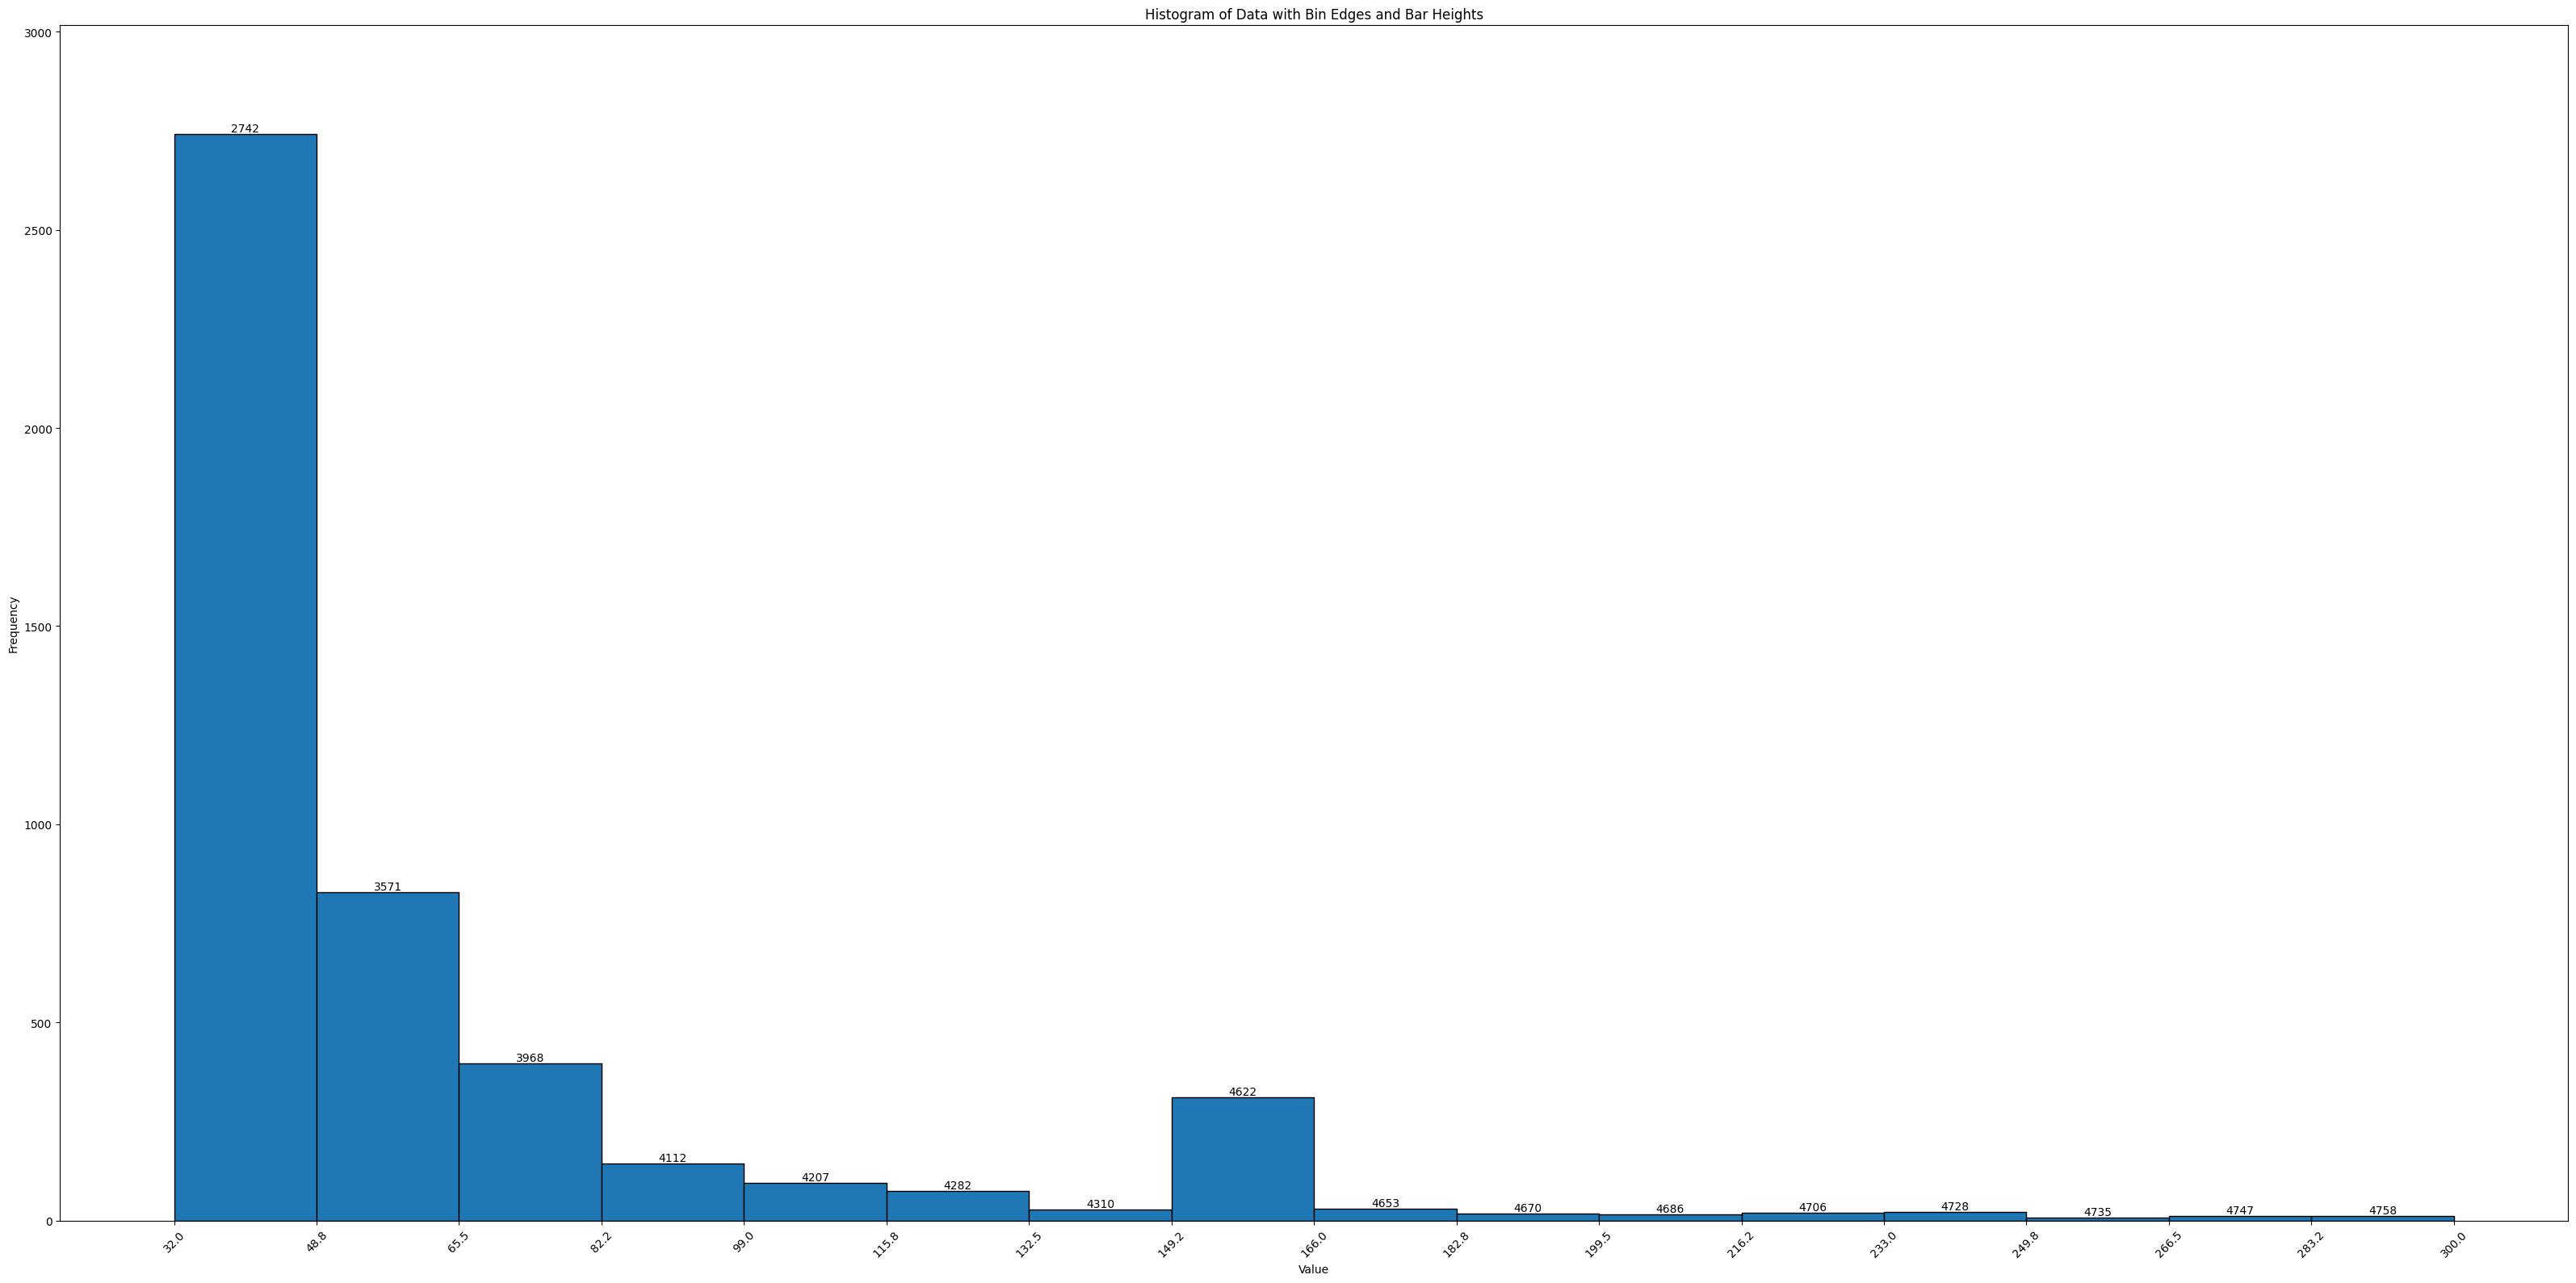

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# Create histogram
plt.figure(figsize=(32, 16))
counts, bins, patches = plt.hist(sample_counts, bins=16, edgecolor='black')

cumulative_sums = np.cumsum(counts)

# Add labels and title
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Data with Bin Edges and Bar Heights')

# Show bin edges on x-axis
plt.xticks(bins)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add text labels on top of each bar
# Add text labels on top of each bar with cumulative sums
for i, (count, cum_sum) in enumerate(zip(counts, cumulative_sums)):
    plt.text(patches[i].get_x() + patches[i].get_width()/2, count, 
             f'{int(cum_sum)}', ha='center', va='bottom')

# Adjust y-axis to make room for text labels
plt.ylim(0, max(counts) * 1.1)

# Adjust layout to prevent cutting off labels
plt.tight_layout()

# Show the plot
plt.show()